In [1]:
import os
import csv
import numpy as np
import utils
import hrr_utils
import RM_utils
import Regression_utils as r_utils
import time
import random
import scipy
import sklearn

from scipy import spatial
from scipy.spatial import distance
from sklearn import linear_model
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline

cwd = os.getcwd()

alph = 'abcdefghijklmnopqrstuvwxyz#.'
N=1000
D = len(alph)
dic1 = letter_vecs = 2 * (np.random.randn(D, N) < 0) - 1
dic2 = letter_vecs = 2 * (np.random.randn(D, N) < 0) - 1


In [2]:
def shuffle(arr):
    indices = [i for i in range(len(arr))]
    random.shuffle(indices)
    newarr = [arr[i] for i in indices]
    return newarr
    
reg_pres, reg_past, reg_freq = utils.GetRegularVerbs(frequency=1)
irreg_pres, irreg_past, irreg_freq = utils.GetIrregularVerbs(frequency=1)

regular = zip(reg_pres, reg_past, reg_freq)
irregular = zip(irreg_pres, irreg_past, irreg_freq)

train_frac = 2/3.0

irregular_train_idx = int(train_frac*len(irreg_pres))
train_irreg = shuffle(irregular[0:irregular_train_idx])

regular_train_idx = 1700 - len(train_irreg) 
train_reg = shuffle(regular[0:regular_train_idx])

test_reg = shuffle(regular[regular_train_idx:])
test_irreg = shuffle(irregular[irregular_train_idx:])

train_all = shuffle(train_reg + train_irreg)
test_all = shuffle(test_reg + test_irreg)


In [3]:
print len(train_irreg)
print len(train_reg)

122
1578


In [4]:
trainX, trainpres1, trainpres2, trainpast1, trainpast2 = RM_utils.genX(train_all, N, dic1, dic2, alph)
testX, testpres1, testpres2, testpast1, testpast2 = RM_utils.genX(test_all, N, dic1, dic2, alph)

regtrainX, regtrainpres1, regtrainpres2, regtrainpast1, regtrainpast2 = RM_utils.genX(train_reg, N, dic1, dic2, alph)
regtestX, regtestpres1, regtestpres2, regtestpast1, regtestpast2 = RM_utils.genX(test_reg, N, dic1, dic2, alph)

irregtrainX, irregtrainpres1, irregtrainpres2, irregtrainpast1, irregtrainpast2 = RM_utils.genX(train_irreg, N, dic1, dic2, alph)
irregtestX, irregtestpres1, irregtestpres2, irregtestpast1, irregtestpast2 = RM_utils.genX(test_irreg, N, dic1, dic2, alph)

In [5]:
x, y1, y2, yreg, yirreg, y1std, y2std, yregstd, yirregstd, acc1, acc2, accreg, accirreg = \
r_utils.closed_trigram_dict(trainpres1, testpres1, \
                            trainpast2, testpast2, \
                            regtestpres1, irregtestpres1, \
                            regtestpast2, irregtestpast2, \
                            N, 5e-2)

figures/reg5ression-unregularized_closedform-trigram-N=1000-W=1700-171227


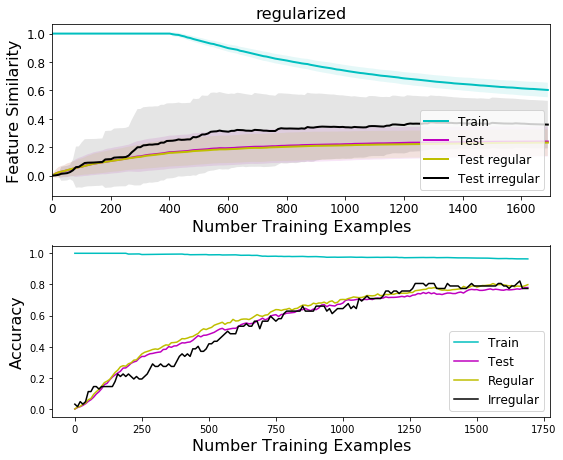

In [6]:
r_utils.graph(x, y1, y2, y1std, y2std, \
              yreg, yirreg, yregstd, yirregstd, \
              acc1, acc2, accreg, accirreg, \
              title='regularized', xlabel='number of words', ylabel='average dot product', legend='lower right')
    
fname =  ('figures/reg5ression-unregularized_closedform-trigram-N=' + str(N) + '-W=' + str(len(trainpres1)) 
          + '-' + time.strftime('%y%m%d'))
print fname

plt.savefig(fname + '.png', transparent=True)
plt.savefig(fname + '.eps', transparent=True)


figures/regression-separate-diff_regularized_closedform_trigam-N=1000-W=1700-171227


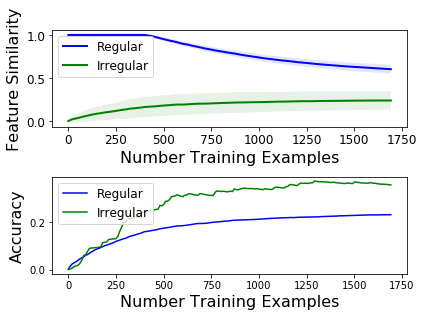

In [7]:
RM_utils.graph_separate(x, y1, y2, y1std, y2std, \
               yreg, yirreg, \
               accreg, accirreg)
    
fname =  ('figures/regression-separate-diff_regularized_closedform_trigam-N=' + str(N) + '-W=' + str(len(trainpres1)) 
          + '-' + time.strftime('%y%m%d'))
print fname

plt.savefig(fname + '.png', transparent=True)
plt.savefig(fname + '.eps', transparent=True)

In [8]:
print y1

[ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  0.99550655  0.99215353  0.99065835  0.98469142  0.98021436  0.97294731
  0.96898468  0.96200311  0.95671491  0.95079679  0.9461309   0.940082
  0.93491944  0.92948843  0.92651822  0.92011482  0.91545473  0.90896819
  0.90329148  0.89739735  0.89398531  0.89029673  0.88640475  0.87918911
  0.87548555  0.87056535  0.86611202  0.86143222  0.85619026  0.85116073
  0.84624898  0.84103123  0.83823519  0.83351351  0.82870574  0.82387506
  0.82048347  0.81705734  0.81336767  0.810105    0.80579234  0.80146415
  0.79818296  0.79456318  0.79051733  0.7